In [13]:
import numpy as np
import cv2 as cv
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt 

%matplotlib inline 

In [14]:
# After we publish the stable version on Pypi, you can use 
# import pv-vision

sys.path.append("../../pv-vision")
from pv_vision.transform_seg.solarmodule import MaskModule

In this tutorial, we will learn how to use pv-vision to 
process a field image with complex background. We will 
need module masks predicted from a deep learning model.

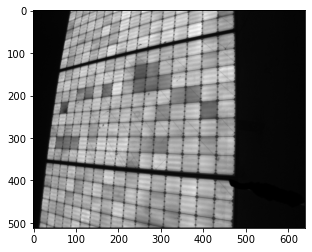

In [15]:
# load the grayscale image
# create a raw module instance

img = cv.imread('../examples/transform_seg/module_imgs/example_1.png', cv.IMREAD_UNCHANGED)
raw_module = MaskModule(img, 8, 16, 0) # 8 rows && 16 columns && 0 busbar
plt.imshow(raw_module.image, 'gray')

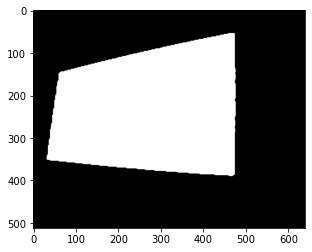

In [16]:
# load mask predicted from UNet
# Set parameter "output=True" in load_mask() if you want to output the mask

raw_module.load_mask('../examples/transform_seg/module_imgs/example_1.png.json')
plt.imshow(raw_module.mask, 'gray')

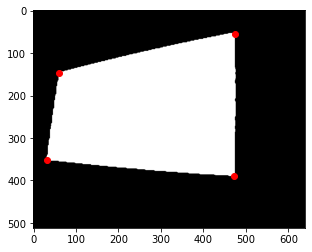

In [17]:
# find corners with method corner_detection_cont(), which is also recommended
corners = raw_module.corner_detection_cont(output=True)
plt.imshow(raw_module.mask, 'gray')

x, y = zip(*corners)
plt.scatter(x, y, c='r')

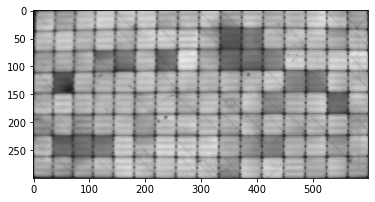

In [18]:
# do perspective transform
img_transformed = raw_module.transform(width=600, height=300, img_only=True)
plt.imshow(img_transformed, 'gray')
# you can also set "img_only=False" to output a transformed module instance. This will be useful
# when you want to crop out single cells

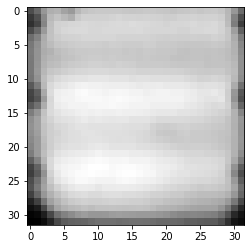

In [19]:
# crop the cells
# you can pass the cropped cells to single_cells.
single_cells = raw_module.crop_cell(32, vl_interval=30, vl_split_size=20,
                  hl_interval=30, hl_split_size=20, margin=20)
plt.imshow(single_cells[10], 'gray')

# Done!